<a href="https://colab.research.google.com/github/SUJOY-RAY/House-Price-prediction/blob/main/House_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [7]:
pd.set_option('display.max_columns',None)

In [15]:
# import pandas as pd
dataframe=pd.read_csv('/content/house_data.csv')
dataframe = dataframe.apply(pd.to_numeric, errors='coerce',downcast='integer')
dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209,538000,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225,180000,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209,604000,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218,510000,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
dataframe.shape


(10259, 21)

In [18]:
dataframe=dataframe.drop(['id','lat','long',],axis=1)

In [19]:
dataframe.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013,221900,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,1340.0,5650.0
1,20141209,538000,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,1690.0,7639.0
2,20150225,180000,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,2720.0,8062.0
3,20141209,604000,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,1360.0,5000.0
4,20150218,510000,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,1800.0,7503.0


In [20]:
dataframe['total area']=dataframe['sqft_living']+dataframe['sqft_basement']+dataframe['sqft_lot']+dataframe['sqft_above']+dataframe['sqft_living15']+dataframe['sqft_lot15']
dataframe.drop(['sqft_living','sqft_basement','sqft_lot'],axis=1,inplace=True)
dataframe['average condition grade'] = (dataframe['condition'] + dataframe['grade']) / 2
dataframe.drop(['condition','grade'],axis=1,inplace=True)
dataframe.head()


,date,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,total area,average condition grade
0,20141013,221900,3.0,1.00,1.0,0.0,0.0,1180.0,1955.0,0.0,98178.0,1340.0,5650.0,15000.0,5.0
1,20141209,538000,3.0,2.25,2.0,0.0,0.0,2170.0,1951.0,1991.0,98125.0,1690.0,7639.0,21711.0,5.0
2,20150225,180000,2.0,1.00,1.0,0.0,0.0,770.0,1933.0,0.0,98028.0,2720.0,8062.0,22322.0,4.5
3,20141209,604000,4.0,3.00,1.0,0.0,0.0,1050.0,1965.0,0.0,98136.0,1360.0,5000.0,15280.0,6.0
4,20150218,510000,3.0,2.00,1.0,0.0,0.0,1680.0,1987.0,0.0,98074.0,1800.0,7503.0,20743.0,5.5


In [21]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10259 entries, 0 to 10258
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     10259 non-null  int32  
 1   price                    10259 non-null  int32  
 2   bedrooms                 10258 non-null  float64
 3   bathrooms                10258 non-null  float64
 4   floors                   10258 non-null  float64
 5   waterfront               10258 non-null  float64
 6   view                     10258 non-null  float64
 7   sqft_above               10258 non-null  float64
 8   yr_built                 10258 non-null  float64
 9   yr_renovated             10258 non-null  float64
 10  zipcode                  10258 non-null  float64
 11  sqft_living15            10258 non-null  float64
 12  sqft_lot15               10258 non-null  float64
 13  total area               10258 non-null  float64
 14  average condition grad

In [22]:
dataframe.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,total area,average condition grade
0,20141013,221900,3.0,1.00,1.0,0.0,0.0,1180.0,1955.0,0.0,98178.0,1340.0,5650.0,15000.0,5.0
1,20141209,538000,3.0,2.25,2.0,0.0,0.0,2170.0,1951.0,1991.0,98125.0,1690.0,7639.0,21711.0,5.0
2,20150225,180000,2.0,1.00,1.0,0.0,0.0,770.0,1933.0,0.0,98028.0,2720.0,8062.0,22322.0,4.5
3,20141209,604000,4.0,3.00,1.0,0.0,0.0,1050.0,1965.0,0.0,98136.0,1360.0,5000.0,15280.0,6.0
4,20150218,510000,3.0,2.00,1.0,0.0,0.0,1680.0,1987.0,0.0,98074.0,1800.0,7503.0,20743.0,5.5


In [23]:
dataframe.isnull().sum()
dataframe.describe()

,date,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,total area,average condition grade
count,1.025900e+04,1.025900e+04,10258.000000,10258.000000,10258.000000,10258.000000,10258.000000,10258.000000,10258.000000,10258.000000,10258.000000,10258.000000,10258.000000,1.025800e+04,10258.000000
mean,2.014394e+07,5.321271e+05,3.361571,2.060733,1.432687,0.007799,0.237278,1749.059173,1967.297231,90.689218,98077.852018,1975.140281,13298.175473,3.528715e+04,5.520277
std,4.452593e+03,3.743744e+05,0.914281,0.764578,0.512282,0.087970,0.763840,808.456537,27.973944,415.751398,53.900275,671.260249,27111.224111,6.677365e+04,0.631837
min,2.014050e+07,4.150000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,380.000000,1900.000000,0.000000,98001.000000,620.000000,660.000000,4.410000e+03,2.500000
25%,2.014072e+07,3.150000e+05,3.000000,1.500000,1.000000,0.000000,0.000000,1180.000000,1950.000000,0.000000,98032.000000,1490.000000,5428.750000,1.653225e+04,5.000000
50%,2.014102e+07,4.459500e+05,3.000000,2.000000,1.000000,0.000000,0.000000,1530.000000,1969.000000,0.000000,98065.000000,1830.000000,7841.000000,2.157400e+04,5.500000
75%,2.015022e+07,6.390000e+05,4.000000,2.500000,2.000000,0.000000,0.000000,2130.000000,1990.000000,0.000000,98118.000000,2340.000000,10367.750000,2.857400e+04,6.000000
max,2.015052e+07,7.700000e+06,11.000000,8.000000,3.500000,1.000000,4.000000,8860.000000,2015.000000,2015.000000,98199.000000,5790.000000,871200.000000,2.082100e+06,8.500000


In [24]:
dataframe.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,total area,average condition grade
0,20141013,221900,3.0,1.00,1.0,0.0,0.0,1180.0,1955.0,0.0,98178.0,1340.0,5650.0,15000.0,5.0
1,20141209,538000,3.0,2.25,2.0,0.0,0.0,2170.0,1951.0,1991.0,98125.0,1690.0,7639.0,21711.0,5.0
2,20150225,180000,2.0,1.00,1.0,0.0,0.0,770.0,1933.0,0.0,98028.0,2720.0,8062.0,22322.0,4.5
3,20141209,604000,4.0,3.00,1.0,0.0,0.0,1050.0,1965.0,0.0,98136.0,1360.0,5000.0,15280.0,6.0
4,20150218,510000,3.0,2.00,1.0,0.0,0.0,1680.0,1987.0,0.0,98074.0,1800.0,7503.0,20743.0,5.5


In [25]:
# from sklearn.preprocessing import StandardScaler
# le=StandardScaler()
# dataframe['total area']=le.fit_transform(dataframe[['total area']])
# dataframe['bedrooms']=le.fit_transform(dataframe[['bedrooms']])
# dataframe['bathrooms']=le.fit_transform(dataframe[['bathrooms']])
# dataframe['floors']=le.fit_transform(dataframe[['floors']])
# dataframe['yr_built']=le.fit_transform(dataframe[['yr_built']])
# dataframe['yr_renovated']=le.fit_transform(dataframe[['yr_renovated']])
# dataframe['waterfront']=le.fit_transform(dataframe[['waterfront']])
# dataframe['view']=le.fit_transform(dataframe[['view']])

<Axes: >

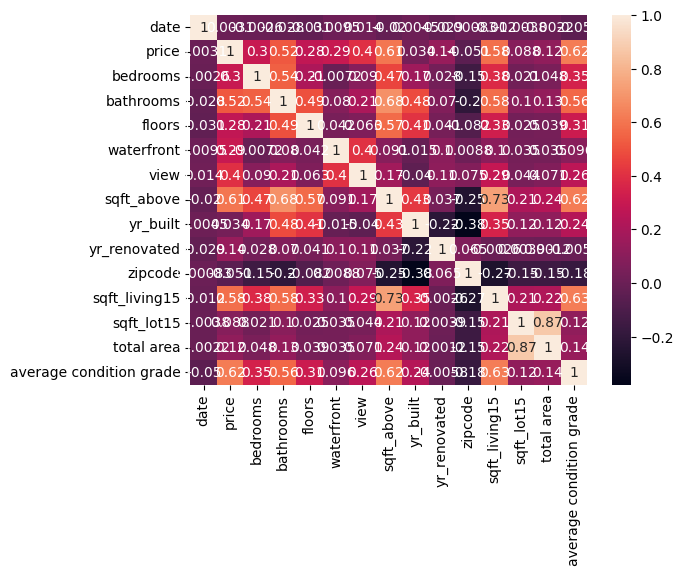

In [26]:
import seaborn as sns
corr=dataframe.corr()
sns.heatmap(corr,annot=True)

In [29]:
dataframe.dropna(axis=0,inplace=True)

In [30]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

X = dataframe.drop('price', axis=1)
y = dataframe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=XGBRegressor()
# model5=LogisticRegression()
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
# model5.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
print(mean_squared_error(model1.predict(X_test),y_test))
print(mean_squared_error(model2.predict(X_test),y_test))
print(mean_squared_error(model3.predict(X_test),y_test))
print(mean_squared_error(model4.predict(X_test),y_test))
# print(r2_score(model5.predict(X_test),y_test))

62193310744.91553
82230882027.2634
35196150026.732635
30462740172.133762


In [44]:
data=X_test.iloc[1]

In [45]:
model2.predict([data])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([735000.])

In [46]:
y_test.iloc[1]

725000